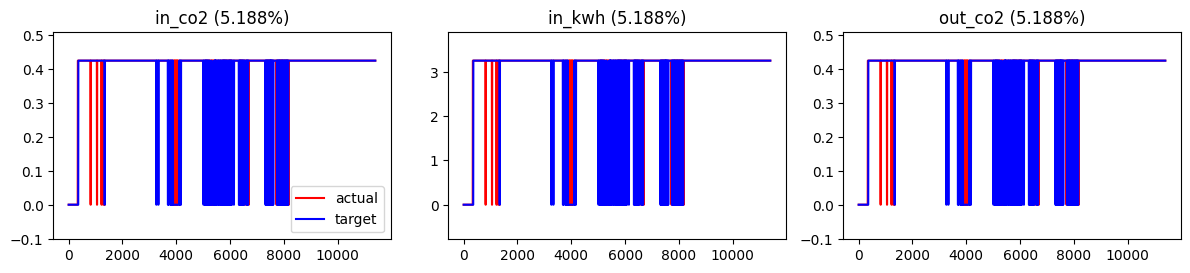

In [22]:
from model_comparison import compare_agent

compare_agent('b2_mission1a', 'co2_removal_SAWD', ncols=3)

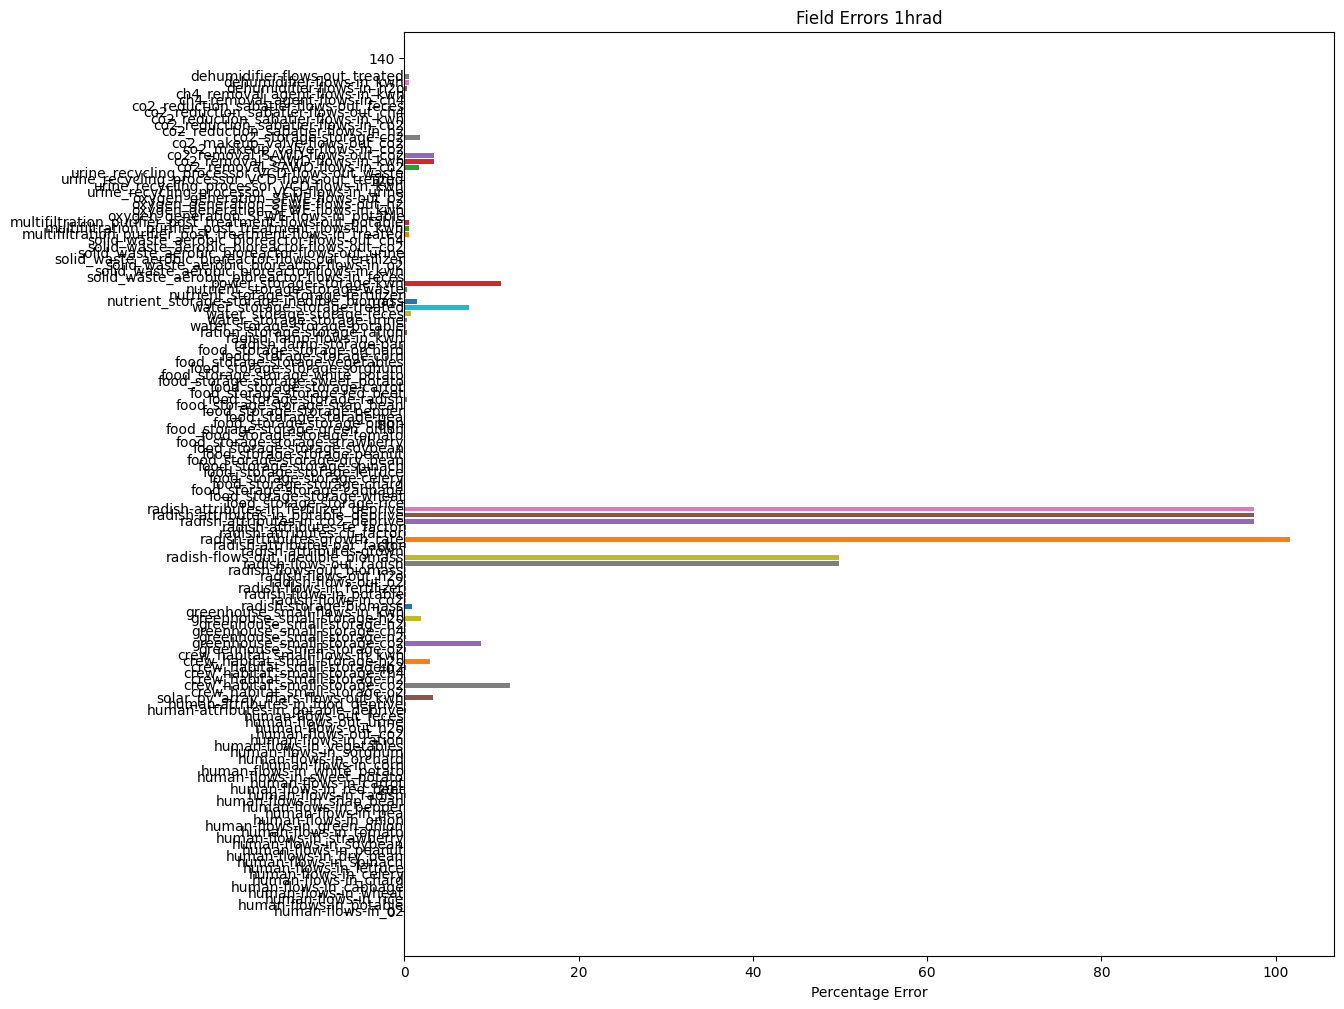

In [24]:
import json
import matplotlib.pyplot as plt

def plot_bar_chart(data_dict, parent_key='', y_pos=0, exclude=[]):
    """
    Recursively plot a horizontal bar chart for a multi-level dictionary.
    """
    for key, value in data_dict.items():
        full_key = f'{parent_key}-{key}' if parent_key else key
        if full_key in exclude:
            continue
        if isinstance(value, dict):
            y_pos = plot_bar_chart(value, full_key, y_pos, exclude)
        else:
            abs_value = abs(value)
            plt.barh(y_pos, abs_value)
            if value < 0:
                plt.text(0, y_pos, full_key, ha='right', va='center')
            else:
                plt.text(0, y_pos, full_key, ha='right', va='center')
            y_pos += 1
    return y_pos

def plot_comparison_report(stem, exclude=[]):
    with open(f'test/v1_simdata/comparison_report_{stem}.json') as f:
        report = json.load(f)
    plt.figure(figsize=(12, 12))
    plot_bar_chart(report, exclude=exclude)
    plt.xlabel('Percentage Error')
    plt.title(f'Field Errors {stem}')
    plt.show()
    
plot_comparison_report('1hrad')